In [1]:
# Author : Arthur Prigent
# Email: aprigent@geomar.de

In [1]:
from load_librairies import *
import xscale.signal.fitting as xsf
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
lon_min = -40
lon_max = 5
lat_min = -3
lat_max = 3

period_str_1 = 1950
period_end_1 = 1999

period_str_2 = 2050
period_end_2 = 2099

def is_jja(month):
    return (month >= 6) & (month <= 8)
def is_mjj(month):
    return (month >= 5) & (month <= 7)

def relative_std(a, b):
    return (a - b) / a
now = datetime.now()
date_time = now.strftime("%d/%m/%Y")

def f_test(x, y):
    x = np.array(x)
    y = np.array(y)
    f = np.var(x, ddof=1)/np.var(y, ddof=1) #calculate F test statistic 
    dfn = x.size-1 #define degrees of freedom numerator 
    dfd = y.size-1 #define degrees of freedom denominator 
    p = 1-stats.f.cdf(f, dfn, dfd) #find p-value of F test statistic 
    return f, p
######################
#      TO CHANGE     # 
######################

path_fig = '/Users/aprigent/Documents/Thesis_GEOMAR/Projects/weakened_sst_variability_CMIP5/figures/new_version/reviews/'
path_data = '/Users/aprigent/Documents/Thesis_GEOMAR/Projects/weakened_sst_variability_CMIP5/scripts/new_version/to_publish/data/'


# Load data

In [2]:
#Files created in: 
# scripts_tmp/create_file_mean_sst_CMIP5.ipynb
# scripts_tmp/create_file_mean_sst_CMIP6.ipynb
monthly_sst_mean_model_1_CMIP5= xr.open_dataset(path_data+'mean_sst_hist_monthly_CMIP5.nc')
monthly_sst_mean_model_2_CMIP5= xr.open_dataset(path_data+'mean_sst_ssp5_monthly_CMIP5.nc')
monthly_sst_mean_model_3_CMIP5= xr.open_dataset(path_data+'mean_sst_rcp45_monthly_CMIP5.nc')
monthly_sst_mean_model_4_CMIP5= xr.open_dataset(path_data+'mean_sst_rcp26_monthly_CMIP5.nc')
monthly_sst_mean_model_5_CMIP5= xr.open_dataset(path_data+'mean_sst_rcp60_monthly_CMIP5.nc')


monthly_sst_mean_model_1_CMIP6= xr.open_dataset(path_data+'mean_sst_hist_monthly_CMIP6.nc')
monthly_sst_mean_model_2_CMIP6= xr.open_dataset(path_data+'mean_sst_ssp585_monthly_CMIP6.nc')
monthly_sst_mean_model_3_CMIP6= xr.open_dataset(path_data+'mean_sst_ssp126_monthly_CMIP6.nc')
monthly_sst_mean_model_4_CMIP6= xr.open_dataset(path_data+'mean_sst_ssp245_monthly_CMIP6.nc')
monthly_sst_mean_model_5_CMIP6= xr.open_dataset(path_data+'mean_sst_ssp370_monthly_CMIP6.nc')


# Figure 2 STD SSTa and uwinda changes

In [3]:
# Files created in:
# scripts_tmp/create_file_std_ssta_uasa_CMIP5.ipynb
ssta_atl3_hist_cmip5 = xr.open_dataset(path_data+'ssta_hist_monthly_CMIP5.nc')
ssta_atl3_ssp5_cmip5 = xr.open_dataset(path_data+'ssta_ssp5_monthly_CMIP5.nc')
ssta_atl3_rcp45_cmip5 = xr.open_dataset(path_data+'ssta_rcp45_monthly_CMIP5.nc')
ssta_atl3_rcp26_cmip5 = xr.open_dataset(path_data+'ssta_rcp26_monthly_CMIP5.nc')
ssta_atl3_rcp60_cmip5 = xr.open_dataset(path_data+'ssta_rcp60_monthly_CMIP5.nc')

In [4]:
## Take JJA anomalies only ## 
ssta_atl3_hist_cmip5_jja_mean =  ssta_atl3_hist_cmip5.sel(time=is_jja(
    ssta_atl3_hist_cmip5['time.month']))

ssta_atl3_ssp5_cmip5_jja_mean =  ssta_atl3_ssp5_cmip5.sel(time=is_jja(
    ssta_atl3_ssp5_cmip5['time.month']))

ssta_atl3_rcp45_cmip5_jja_mean =  ssta_atl3_rcp45_cmip5.sel(time=is_jja(
    ssta_atl3_rcp45_cmip5['time.month']))

ssta_atl3_rcp26_cmip5_jja_mean =  ssta_atl3_rcp26_cmip5.sel(time=is_jja(
    ssta_atl3_rcp26_cmip5['time.month']))

ssta_atl3_rcp60_cmip5_jja_mean =  ssta_atl3_rcp60_cmip5.sel(time=is_jja(
    ssta_atl3_rcp60_cmip5['time.month']))

In [5]:
## Compute std of the JJA SST anomalies ## 
std_ssta_atl3_hist_cmip5_jja_mean = ssta_atl3_hist_cmip5_jja_mean.ssta.std(dim='time')
std_ssta_atl3_ssp5_cmip5_jja_mean = ssta_atl3_ssp5_cmip5_jja_mean.ssta.std(dim='time')
std_ssta_atl3_rcp45_cmip5_jja_mean = ssta_atl3_rcp45_cmip5_jja_mean.ssta.std(dim='time')
std_ssta_atl3_rcp26_cmip5_jja_mean = ssta_atl3_rcp26_cmip5_jja_mean.ssta.std(dim='time')
std_ssta_atl3_rcp60_cmip5_jja_mean = ssta_atl3_rcp60_cmip5_jja_mean.ssta.std(dim='time')


# Do F-test

In [6]:
p_val_levene_hist_rcp85 = np.ones((ssta_atl3_hist_cmip5_jja_mean.ssta.shape[0]))*np.nan
p_val_levene_hist_rcp45 = np.ones((ssta_atl3_hist_cmip5_jja_mean.ssta.shape[0]))*np.nan
p_val_levene_hist_rcp26 = np.ones((ssta_atl3_hist_cmip5_jja_mean.ssta.shape[0]))*np.nan
p_val_levene_hist_rcp60 = np.ones((ssta_atl3_hist_cmip5_jja_mean.ssta.shape[0]))*np.nan

p_val_ftest_hist_rcp85 = np.ones((ssta_atl3_hist_cmip5_jja_mean.ssta.shape[0]))*np.nan
p_val_ftest_hist_rcp45 = np.ones((ssta_atl3_hist_cmip5_jja_mean.ssta.shape[0]))*np.nan
p_val_ftest_hist_rcp26 = np.ones((ssta_atl3_hist_cmip5_jja_mean.ssta.shape[0]))*np.nan
p_val_ftest_hist_rcp60 = np.ones((ssta_atl3_hist_cmip5_jja_mean.ssta.shape[0]))*np.nan
for i in range(p_val_levene_hist_rcp85.shape[0]):
    _, p_val_levene_hist_rcp85[i]   = stats.levene(ssta_atl3_hist_cmip5_jja_mean.ssta[i,:],
                                                       ssta_atl3_ssp5_cmip5_jja_mean.ssta[i,:],center='mean')
    _, p_val_levene_hist_rcp45[i]   = stats.levene(ssta_atl3_hist_cmip5_jja_mean.ssta[i,:],
                                                       ssta_atl3_rcp45_cmip5_jja_mean.ssta[i,:],center='mean')
    _, p_val_levene_hist_rcp26[i]   = stats.levene(ssta_atl3_hist_cmip5_jja_mean.ssta[i,:],
                                                       ssta_atl3_rcp26_cmip5_jja_mean.ssta[i,:],center='mean')
    _, p_val_levene_hist_rcp60[i]   = stats.levene(ssta_atl3_hist_cmip5_jja_mean.ssta[i,:],
                                                       ssta_atl3_rcp60_cmip5_jja_mean.ssta[i,:],center='mean')
    
    _, p_val_ftest_hist_rcp85[i]   = f_test(ssta_atl3_hist_cmip5_jja_mean.ssta[i,:],
                                                       ssta_atl3_ssp5_cmip5_jja_mean.ssta[i,:])
    _, p_val_ftest_hist_rcp45[i]   = f_test(ssta_atl3_hist_cmip5_jja_mean.ssta[i,:],
                                                       ssta_atl3_rcp45_cmip5_jja_mean.ssta[i,:])
    _, p_val_ftest_hist_rcp26[i]   = f_test(ssta_atl3_hist_cmip5_jja_mean.ssta[i,:],
                                                       ssta_atl3_rcp26_cmip5_jja_mean.ssta[i,:])
    _, p_val_ftest_hist_rcp60[i]   = f_test(ssta_atl3_hist_cmip5_jja_mean.ssta[i,:],
                                                       ssta_atl3_rcp60_cmip5_jja_mean.ssta[i,:])
    
    


In [7]:
significant_test_cmip5  = xr.Dataset({'pval_hist_rcp85': (['model'],p_val_levene_hist_rcp85),
                                      'pval_hist_rcp45': (['model'],p_val_levene_hist_rcp45),
                                      'pval_hist_rcp60': (['model'],p_val_levene_hist_rcp60),
                                      'pval_hist_rcp26': (['model'],p_val_levene_hist_rcp60),
                                      'pval_hist_rcp85_ftest': (['model'],p_val_ftest_hist_rcp85),
                                      'pval_hist_rcp45_ftest': (['model'],p_val_ftest_hist_rcp45),
                                     'pval_hist_rcp60_ftest': (['model'],p_val_ftest_hist_rcp60),
                                     'pval_hist_rcp26_ftest': (['model'],p_val_ftest_hist_rcp26)}
                           ,coords={'model': ssta_atl3_hist_cmip5_jja_mean.model}

                           ,attrs={'standard_name': 'pval_levene',
                                    'long_name': 'P-value Levene/Ftest test',
                                    'model': 'CMIP5',
                                    'Scenario': 'Historical',
                                    'Creation_date':date_time,   
                                    'author': 'Arthur Prigent'})

In [8]:
significant_test_cmip5.pval_hist_rcp85_ftest[significant_test_cmip5.pval_hist_rcp85_ftest<0.05].model

<xarray.DataArray 'model' (model: 13)>
array(['ACCESS1-0', 'CSIRO-Mk3-6-0', 'GISS-E2-H', 'GISS-E2-R-CC', 'GISS-E2-R',
       'HadGEM2-CC', 'IPSL-CM5A-MR', 'MIROC-ESM-CHEM', 'MIROC-ESM', 'MIROC5',
       'MPI-ESM-LR', 'MPI-ESM-MR', 'MRI-CGCM3'], dtype=object)
Coordinates:
  * model    (model) object 'ACCESS1-0' 'CSIRO-Mk3-6-0' ... 'MRI-CGCM3'

In [9]:
# Files created in:
# create_file_std_ssta_uasa_CMIP5.ipynb

ssta_atl3_hist_cmip6 = xr.open_dataset(  path_data+'ssta_hist_monthly_CMIP6.nc')
ssta_atl3_ssp585_cmip6 = xr.open_dataset(path_data+'ssta_ssp585_monthly_CMIP6.nc')
ssta_atl3_ssp370_cmip6 = xr.open_dataset(path_data+'ssta_ssp370_monthly_CMIP6.nc')
ssta_atl3_ssp245_cmip6 = xr.open_dataset(path_data+'ssta_ssp245_monthly_CMIP6.nc')
ssta_atl3_ssp126_cmip6 = xr.open_dataset(path_data+'ssta_ssp126_monthly_CMIP6.nc')



In [10]:
ssta_atl3_hist_cmip6_jja_mean =  ssta_atl3_hist_cmip6.sel(time=is_jja(
    ssta_atl3_hist_cmip6['time.month']))

ssta_atl3_ssp585_cmip6_jja_mean =  ssta_atl3_ssp585_cmip6.sel(time=is_jja(
    ssta_atl3_ssp585_cmip6['time.month']))

ssta_atl3_ssp245_cmip6_jja_mean =  ssta_atl3_ssp245_cmip6.sel(time=is_jja(
    ssta_atl3_ssp245_cmip6['time.month']))

ssta_atl3_ssp126_cmip6_jja_mean =  ssta_atl3_ssp126_cmip6.sel(time=is_jja(
    ssta_atl3_ssp126_cmip6['time.month']))

ssta_atl3_ssp370_cmip6_jja_mean =  ssta_atl3_ssp370_cmip6.sel(time=is_jja(
    ssta_atl3_ssp370_cmip6['time.month']))

In [11]:
std_ssta_atl3_hist_cmip6_jja_mean = ssta_atl3_hist_cmip6_jja_mean.ssta.std(dim='time')
std_ssta_atl3_ssp585_cmip6_jja_mean = ssta_atl3_ssp585_cmip6_jja_mean.ssta.std(dim='time')
std_ssta_atl3_ssp245_cmip6_jja_mean = ssta_atl3_ssp245_cmip6_jja_mean.ssta.std(dim='time')
std_ssta_atl3_ssp126_cmip6_jja_mean = ssta_atl3_ssp126_cmip6_jja_mean.ssta.std(dim='time')
std_ssta_atl3_ssp370_cmip6_jja_mean = ssta_atl3_ssp370_cmip6_jja_mean.ssta.std(dim='time')

In [12]:
p_val_levene_hist_ssp585 = np.ones((ssta_atl3_hist_cmip6_jja_mean.ssta.shape[0]))*np.nan
p_val_levene_hist_ssp126 = np.ones((ssta_atl3_hist_cmip6_jja_mean.ssta.shape[0]))*np.nan
p_val_levene_hist_ssp245 = np.ones((ssta_atl3_hist_cmip6_jja_mean.ssta.shape[0]))*np.nan
p_val_levene_hist_ssp370 = np.ones((ssta_atl3_hist_cmip6_jja_mean.ssta.shape[0]))*np.nan

p_val_ftest_hist_ssp585 = np.ones((ssta_atl3_hist_cmip6_jja_mean.ssta.shape[0]))*np.nan
p_val_ftest_hist_ssp126 = np.ones((ssta_atl3_hist_cmip6_jja_mean.ssta.shape[0]))*np.nan
p_val_ftest_hist_ssp245 = np.ones((ssta_atl3_hist_cmip6_jja_mean.ssta.shape[0]))*np.nan
p_val_ftest_hist_ssp370 = np.ones((ssta_atl3_hist_cmip6_jja_mean.ssta.shape[0]))*np.nan

for i in range(p_val_levene_hist_ssp585.shape[0]):
    _, p_val_levene_hist_ssp585[i]   = stats.levene(ssta_atl3_hist_cmip6_jja_mean.ssta[i,:],
                                                       ssta_atl3_ssp585_cmip6_jja_mean.ssta[i,:],center='mean')
    _, p_val_levene_hist_ssp126[i]   = stats.levene(ssta_atl3_hist_cmip6_jja_mean.ssta[i,:],
                                                       ssta_atl3_ssp126_cmip6_jja_mean.ssta[i,:],center='mean')
    _, p_val_levene_hist_ssp245[i]   = stats.levene(ssta_atl3_hist_cmip6_jja_mean.ssta[i,:],
                                                       ssta_atl3_ssp245_cmip6_jja_mean.ssta[i,:],center='mean')
    _, p_val_levene_hist_ssp370[i]   = stats.levene(ssta_atl3_hist_cmip6_jja_mean.ssta[i,:],
                                                       ssta_atl3_ssp370_cmip6_jja_mean.ssta[i,:],center='mean')
    
    
    _, p_val_ftest_hist_ssp585[i]   = f_test(ssta_atl3_hist_cmip6_jja_mean.ssta[i,:],
                                                       ssta_atl3_ssp585_cmip6_jja_mean.ssta[i,:])
    _, p_val_ftest_hist_ssp126[i]   = f_test(ssta_atl3_hist_cmip6_jja_mean.ssta[i,:],
                                                       ssta_atl3_ssp126_cmip6_jja_mean.ssta[i,:])
    _, p_val_ftest_hist_ssp245[i]   = f_test(ssta_atl3_hist_cmip6_jja_mean.ssta[i,:],
                                                       ssta_atl3_ssp245_cmip6_jja_mean.ssta[i,:])
    _, p_val_ftest_hist_ssp370[i]   = f_test(ssta_atl3_hist_cmip6_jja_mean.ssta[i,:],
                                                       ssta_atl3_ssp370_cmip6_jja_mean.ssta[i,:])


In [13]:
significant_test_cmip6  = xr.Dataset({'pval_hist_ssp585': (['model'],p_val_levene_hist_ssp585),
                                      'pval_hist_ssp126': (['model'],p_val_levene_hist_ssp126),
                                      'pval_hist_ssp245': (['model'],p_val_levene_hist_ssp245),
                                      'pval_hist_ssp370': (['model'],p_val_levene_hist_ssp370),
                                      'pval_hist_ssp585_ftest': (['model'],p_val_ftest_hist_ssp585),
                                      'pval_hist_ssp126_ftest': (['model'],p_val_ftest_hist_ssp126),
                                      'pval_hist_ssp245_ftest': (['model'],p_val_ftest_hist_ssp245),
                                      'pval_hist_ssp370_ftest': (['model'],p_val_ftest_hist_ssp370)}
                           ,coords={'model': ssta_atl3_hist_cmip6_jja_mean.model}

                           ,attrs={'standard_name': 'pval_levene',
                                    'long_name': 'P-value Levene test',
                                    'model': 'CMIP6',
                                    'Scenario': 'Historical',
                                    'Creation_date':date_time,   
                                    'author': 'Arthur Prigent'})

# SST change

In [14]:


sst_warming_rcp85_hist_CMIP5  = monthly_sst_mean_model_2_CMIP5.jja_sst - monthly_sst_mean_model_1_CMIP5.jja_sst
sst_warming_rcp45_hist_CMIP5  = monthly_sst_mean_model_3_CMIP5.jja_sst - monthly_sst_mean_model_1_CMIP5.jja_sst
sst_warming_rcp26_hist_CMIP5  = monthly_sst_mean_model_4_CMIP5.jja_sst - monthly_sst_mean_model_1_CMIP5.jja_sst
sst_warming_rcp60_hist_CMIP5  = monthly_sst_mean_model_5_CMIP5.jja_sst - monthly_sst_mean_model_1_CMIP5.jja_sst



sst_warming_ssp585_hist_CMIP6  = monthly_sst_mean_model_2_CMIP6.jja_sst - monthly_sst_mean_model_1_CMIP6.jja_sst
sst_warming_ssp126_hist_CMIP6  = monthly_sst_mean_model_3_CMIP6.jja_sst - monthly_sst_mean_model_1_CMIP6.jja_sst
sst_warming_ssp245_hist_CMIP6  = monthly_sst_mean_model_4_CMIP6.jja_sst - monthly_sst_mean_model_1_CMIP6.jja_sst
sst_warming_ssp370_hist_CMIP6  = monthly_sst_mean_model_5_CMIP6.jja_sst - monthly_sst_mean_model_1_CMIP6.jja_sst



In [15]:
def common_model(model):
    return ((model== 'CSIRO-Mk3-6-0')|(model== 'GFDL-CM3')|(model=='GFDL-ESM2M')|(model=='GISS-E2-H')|
            (model=='GISS-E2-R')|(model=='IPSL-CM5A-LR')|(model=='MIROC-ESM-CHEM')|(model=='MIROC-ESM')|
            (model=='MIROC5')|(model=='MRI-CGCM3')|(model=='NorESM1-M'))
            


# Std SSTa change

In [16]:
std_sst_change_rcp85_hist = std_ssta_atl3_ssp5_cmip5_jja_mean  - std_ssta_atl3_hist_cmip5_jja_mean
std_sst_change_rcp45_hist = std_ssta_atl3_rcp45_cmip5_jja_mean - std_ssta_atl3_hist_cmip5_jja_mean
std_sst_change_rcp26_hist = std_ssta_atl3_rcp26_cmip5_jja_mean - std_ssta_atl3_hist_cmip5_jja_mean
std_sst_change_rcp60_hist = std_ssta_atl3_rcp60_cmip5_jja_mean - std_ssta_atl3_hist_cmip5_jja_mean


std_sst_change_ssp585_hist = std_ssta_atl3_ssp585_cmip6_jja_mean - std_ssta_atl3_hist_cmip6_jja_mean
std_sst_change_ssp126_hist = std_ssta_atl3_ssp126_cmip6_jja_mean - std_ssta_atl3_hist_cmip6_jja_mean
std_sst_change_ssp245_hist = std_ssta_atl3_ssp245_cmip6_jja_mean - std_ssta_atl3_hist_cmip6_jja_mean
std_sst_change_ssp370_hist = std_ssta_atl3_ssp370_cmip6_jja_mean - std_ssta_atl3_hist_cmip6_jja_mean


In [17]:
std_sst_change_rcp85_hist_response = std_sst_change_rcp85_hist / sst_warming_rcp85_hist_CMIP5
std_sst_change_rcp45_hist_response = std_sst_change_rcp45_hist / sst_warming_rcp45_hist_CMIP5


std_sst_change_ssp585_hist_response = std_sst_change_ssp585_hist / sst_warming_ssp585_hist_CMIP6
std_sst_change_ssp126_hist_response = std_sst_change_ssp126_hist / sst_warming_ssp126_hist_CMIP6

# Plot Figure S3 with common model in the ensemble mean

Text(0, 1.04, 'b)')

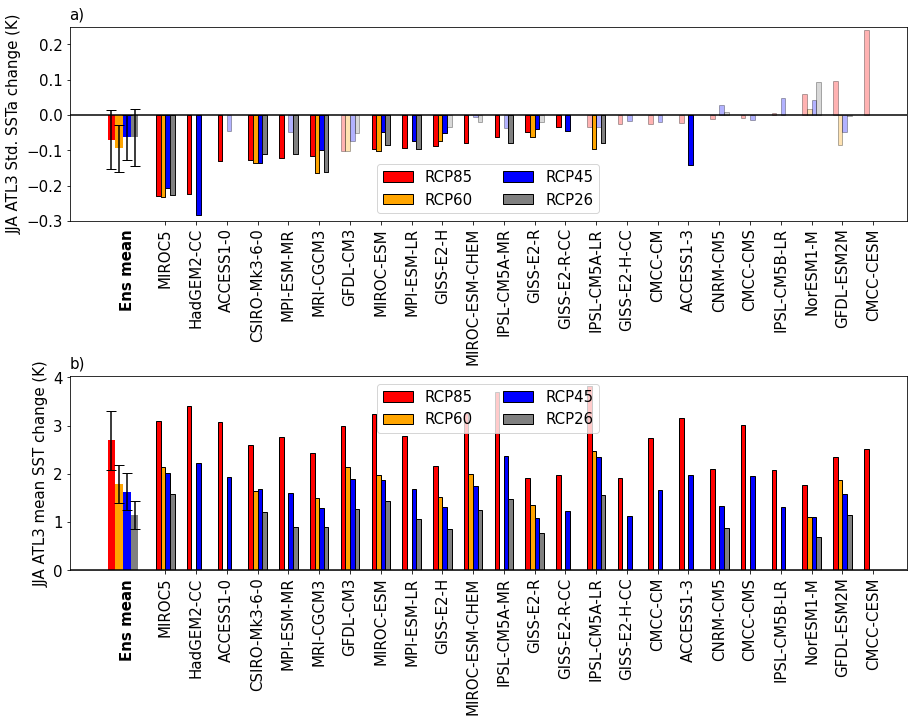

In [18]:
f,ax = plt.subplots(2,1,figsize=[15,10])
ax=ax.ravel()
ftz=15
width=0.6
plt.subplots_adjust( hspace=0.8,
                    wspace=0)
m = np.arange(0, std_sst_change_rcp85_hist.model.shape[0]*4, 4)

ax[0].bar(-7,std_sst_change_rcp85_hist.sel(model=common_model(
    std_sst_change_rcp85_hist['model'])).mean(dim='model'),
          yerr=std_sst_change_rcp85_hist.sel(model=common_model(
    std_sst_change_rcp85_hist['model'])).std(dim='model'),color='red',width=1,capsize=5)
ax[0].bar(-6,std_sst_change_rcp60_hist.sel(model=common_model(
    std_sst_change_rcp60_hist['model'])).mean(dim='model'),
          yerr=std_sst_change_rcp60_hist.sel(model=common_model(
    std_sst_change_rcp60_hist['model'])).std(dim='model'),color='orange',width=1,capsize=5)
ax[0].bar(-5,std_sst_change_rcp45_hist.sel(model=common_model(
    std_sst_change_rcp45_hist['model'])).mean(dim='model'),
          yerr=std_sst_change_rcp45_hist.sel(model=common_model(
    std_sst_change_rcp45_hist['model'])).std(dim='model'),color='blue',width=1,capsize=5)
ax[0].bar(-4,std_sst_change_rcp26_hist.sel(model=common_model(
    std_sst_change_rcp26_hist['model'])).mean(dim='model'),
          yerr=std_sst_change_rcp26_hist.sel(model=common_model(
    std_sst_change_rcp26_hist['model'])).std(dim='model'),color='grey',width=1,capsize=5)



ax[0].bar(m-0.9,
       std_sst_change_rcp85_hist[std_sst_change_rcp85_hist.argsort().values].where(
           significant_test_cmip5.pval_hist_rcp85_ftest<0.05),
          color='red',edgecolor='black',label='RCP85',width=width,alpha=1)
ax[0].bar(m-0.9,
       std_sst_change_rcp85_hist[std_sst_change_rcp85_hist.argsort().values],
          color='red',edgecolor='black',width=width,alpha=0.30)


ax[0].bar(m-0.3,
       std_sst_change_rcp60_hist[std_sst_change_rcp85_hist.argsort().values].where(
           significant_test_cmip5.pval_hist_rcp60_ftest<0.05),
          color='orange',edgecolor='black',label='RCP60',width=width,alpha=1)
ax[0].bar(m-0.3,
       std_sst_change_rcp60_hist[std_sst_change_rcp85_hist.argsort().values],
          color='orange',edgecolor='black',width=width,alpha=0.30)

ax[0].bar(m+0.3,
       std_sst_change_rcp45_hist[std_sst_change_rcp85_hist.argsort().values].where(
           significant_test_cmip5.pval_hist_rcp45_ftest<0.05),
          color='blue',edgecolor='black',label='RCP45',width=width,alpha=1)
ax[0].bar(m+0.3,
       std_sst_change_rcp45_hist[std_sst_change_rcp85_hist.argsort().values],
          color='blue',edgecolor='black',width=width,alpha=0.30)

ax[0].bar(m+0.9,
       std_sst_change_rcp26_hist[std_sst_change_rcp85_hist.argsort().values].where(
           significant_test_cmip5.pval_hist_rcp26_ftest<0.05),
          color='grey',edgecolor='black',label='RCP26',width=width,alpha=1)
ax[0].bar(m+0.9,
       std_sst_change_rcp26_hist[std_sst_change_rcp85_hist.argsort().values],
          color='grey',edgecolor='black',width=width,alpha=0.30)



ax[0].set_xticks(m)
ax[0].set_xticklabels(std_sst_change_rcp85_hist.model[std_sst_change_rcp85_hist.argsort().values])
ax[0].set_xticklabels(std_sst_change_rcp85_hist.model[std_sst_change_rcp85_hist.argsort().values])

ax[0].tick_params(labelsize=ftz)
ax[0].set_xticklabels(std_sst_change_rcp85_hist.model.values[
    std_sst_change_rcp85_hist.argsort().values],rotation=90)
ax[0].axhline(0,color='black')
ax[0].legend(ncol=2,fontsize=ftz)
ax[0].set_ylabel('JJA ATL3 Std. SSTa change (K)',fontsize=ftz)
ax[0].text(0.06, -0.45, 'Ens mean', transform=ax[0].transAxes,
        size=ftz, weight='bold',rotation=90)
ax[0].set_ylim([-0.3,0.25])

ax[1].bar(-7,sst_warming_rcp85_hist_CMIP5.sel(model=common_model(
    sst_warming_rcp85_hist_CMIP5['model'])).mean(dim='model'),
          yerr=sst_warming_rcp85_hist_CMIP5.sel(model=common_model(
    sst_warming_rcp85_hist_CMIP5['model'])).std(dim='model'),color='red',width=1,capsize=5)
ax[1].bar(-6,sst_warming_rcp60_hist_CMIP5.sel(model=common_model(
    sst_warming_rcp60_hist_CMIP5['model'])).mean(dim='model'),
          yerr=sst_warming_rcp60_hist_CMIP5.sel(model=common_model(
    sst_warming_rcp60_hist_CMIP5['model'])).std(dim='model'),color='orange',width=1,capsize=5)
ax[1].bar(-5,sst_warming_rcp45_hist_CMIP5.sel(model=common_model(
    sst_warming_rcp45_hist_CMIP5['model'])).mean(dim='model'),
          yerr=sst_warming_rcp45_hist_CMIP5.sel(model=common_model(
    sst_warming_rcp45_hist_CMIP5['model'])).std(dim='model'),color='blue',width=1,capsize=5)
ax[1].bar(-4,sst_warming_rcp26_hist_CMIP5.sel(model=common_model(
    sst_warming_rcp26_hist_CMIP5['model'])).mean(dim='model'),
          yerr=sst_warming_rcp26_hist_CMIP5.sel(model=common_model(
    sst_warming_rcp26_hist_CMIP5['model'])).std(dim='model'),color='grey',width=1,capsize=5)

ax[1].bar(m-0.9,
       sst_warming_rcp85_hist_CMIP5[std_sst_change_rcp85_hist.argsort().values],
          color='red',edgecolor='black',label='RCP85',width=0.6)

ax[1].bar(m-0.3,
       sst_warming_rcp60_hist_CMIP5[std_sst_change_rcp85_hist.argsort().values],
          color='orange',edgecolor='black',label='RCP60',width=0.6)

ax[1].bar(m+0.3,
       sst_warming_rcp45_hist_CMIP5[std_sst_change_rcp85_hist.argsort().values],
          color='blue',edgecolor='black',label='RCP45',alpha=1,width=0.6)

ax[1].bar(m+0.9,
       sst_warming_rcp26_hist_CMIP5[std_sst_change_rcp85_hist.argsort().values],
          color='grey',edgecolor='black',label='RCP26',alpha=1,width=0.6)

ax[1].legend(ncol=2,fontsize=ftz)
ax[1].set_xticks(m)
ax[1].set_xticklabels(std_sst_change_rcp85_hist.model[std_sst_change_rcp85_hist.argsort().values])
ax[1].tick_params(labelsize=ftz)
ax[1].set_xticklabels(std_sst_change_rcp85_hist.model.values[
    std_sst_change_rcp85_hist.argsort().values],rotation=90)
ax[1].axhline(0,color='black')
ax[1].set_ylabel('JJA ATL3 mean SST change (K)',fontsize=ftz)
ax[1].text(0.06, -0.45, 'Ens mean', transform=ax[1].transAxes,
        size=ftz, weight='bold',rotation=90)


ax[0].text(0, 1.04, string.ascii_lowercase[0]+')', transform=ax[0].transAxes,
        size=ftz)
ax[1].text(0, 1.04, string.ascii_lowercase[1]+')', transform=ax[1].transAxes,
        size=ftz)

#plt.savefig(path_fig + 'figure_S3_review.pdf',
#            dpi=300, bbox_inches='tight')

# Figure S4 

In [20]:
def common_model_cmip6(model):
    return ((model== 'MIROC6')|(model== 'CanESM5')|(model=='MPI-ESM1-2-HR')|(model=='ACCESS-CM2')|
            (model=='CAMS-CSM1-0')|(model=='IMM-CM5-0')|(model=='IPSL-CM6A-LR')|(model=='IMM-CM4-8')|
            (model=='ACCESS-ESM1-5')|(model=='EC-Earth3-Veg')|(model=='BCC-CSM2-MR')|(model=='MPI-ESM1-2-LR')|
           (model=='EC-Earth3'))

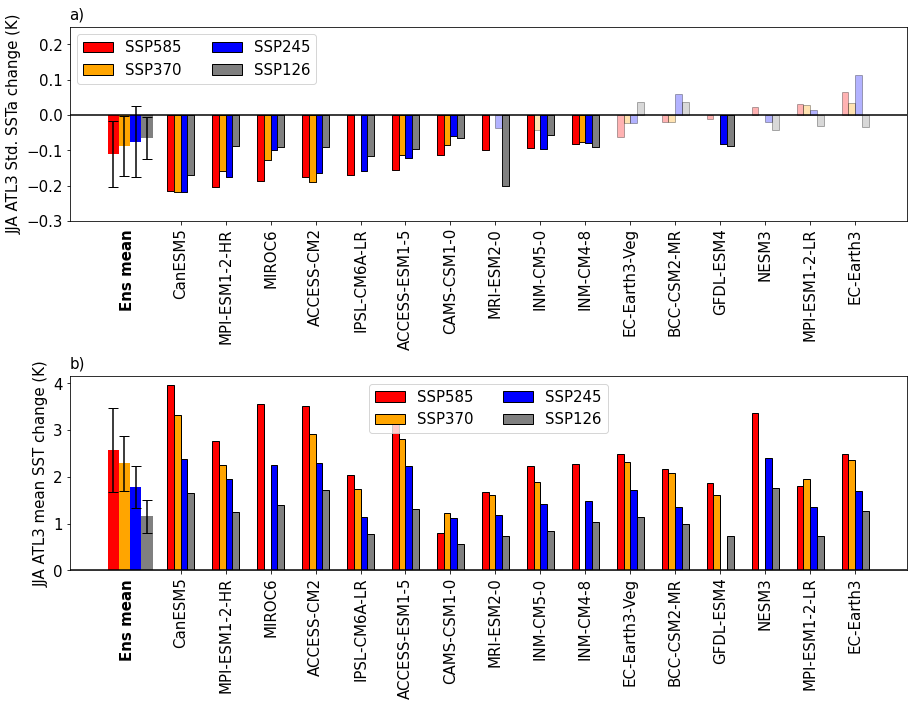

In [23]:
f,ax = plt.subplots(2,1,figsize=[15,10])
ax=ax.ravel()
ftz=15
width=0.6
plt.subplots_adjust( hspace=0.8,
                    wspace=0)
m = np.arange(0, std_sst_change_ssp585_hist.model.shape[0]*4, 4)



ax[0].bar(-6,std_sst_change_ssp585_hist.sel(model=common_model_cmip6(
    std_sst_change_ssp585_hist['model'])).mean(dim='model'),
          yerr=std_sst_change_ssp585_hist.sel(model=common_model_cmip6(
    std_sst_change_ssp585_hist['model'])).std(dim='model'),color='red',width=1,capsize=5)
ax[0].bar(-5,std_sst_change_ssp370_hist.sel(model=common_model_cmip6(
    std_sst_change_ssp370_hist['model'])).mean(dim='model'),
          yerr=std_sst_change_ssp370_hist.sel(model=common_model_cmip6(
    std_sst_change_ssp370_hist['model'])).std(dim='model'),color='orange',width=1,capsize=5)
ax[0].bar(-4,std_sst_change_ssp245_hist.sel(model=common_model_cmip6(
    std_sst_change_ssp245_hist['model'])).mean(dim='model'),
          yerr=std_sst_change_ssp245_hist.sel(model=common_model_cmip6(
    std_sst_change_ssp245_hist['model'])).std(dim='model'),color='blue',width=1,capsize=5)
ax[0].bar(-3,std_sst_change_ssp126_hist.sel(model=common_model_cmip6(
    std_sst_change_ssp126_hist['model'])).mean(dim='model'),
          yerr=std_sst_change_ssp126_hist.sel(model=common_model_cmip6(
    std_sst_change_ssp126_hist['model'])).std(dim='model'),color='grey',width=1,capsize=5)

ax[0].bar(m-0.9,
       std_sst_change_ssp585_hist[std_sst_change_ssp585_hist.argsort().values].where(
           significant_test_cmip6.pval_hist_ssp585_ftest<0.05),
          color='red',edgecolor='black',label='SSP585',width=width)
ax[0].bar(m-0.9,
       std_sst_change_ssp585_hist[std_sst_change_ssp585_hist.argsort().values],
          color='red',edgecolor='black',width=width,alpha=0.30)

ax[0].bar(m-0.3,
       std_sst_change_ssp370_hist[std_sst_change_ssp585_hist.argsort().values].where(
           significant_test_cmip6.pval_hist_ssp370_ftest<0.05),
          color='orange',edgecolor='black',label='SSP370',width=width)
ax[0].bar(m-0.3,
       std_sst_change_ssp370_hist[std_sst_change_ssp585_hist.argsort().values],
          color='orange',edgecolor='black',width=width,alpha=0.30)


ax[0].bar(m+0.3,
       std_sst_change_ssp245_hist[std_sst_change_ssp585_hist.argsort().values].where(
           significant_test_cmip6.pval_hist_ssp245_ftest<0.05),
          color='blue',edgecolor='black',label='SSP245',width=width)
ax[0].bar(m+0.3,
       std_sst_change_ssp245_hist[std_sst_change_ssp585_hist.argsort().values],
          color='blue',edgecolor='black',alpha=0.3,width=width)


ax[0].bar(m+0.9,
       std_sst_change_ssp126_hist[std_sst_change_ssp585_hist.argsort().values].where(
           significant_test_cmip6.pval_hist_ssp126_ftest<0.05),
          color='grey',edgecolor='black',label='SSP126',width=width)
ax[0].bar(m+0.9,
       std_sst_change_ssp126_hist[std_sst_change_ssp585_hist.argsort().values],
          color='grey',edgecolor='black',alpha=0.3,width=width)




ax[0].set_xticks(m)
ax[0].set_xticklabels(std_sst_change_ssp585_hist.model[std_sst_change_ssp585_hist.argsort().values])

ax[0].tick_params(labelsize=ftz)
ax[0].set_xticklabels(std_sst_change_ssp585_hist.model.values[
    std_sst_change_ssp585_hist.argsort().values],rotation=90)
ax[0].axhline(0,color='black')
ax[0].legend(ncol=2,fontsize=ftz)
ax[0].text(0.06, -0.45, 'Ens mean', transform=ax[0].transAxes,
        size=ftz, weight='bold',rotation=90)
ax[0].set_ylabel('JJA ATL3 Std. SSTa change (K)',fontsize=ftz)
ax[0].set_ylim([-0.3,0.25])


ax[1].bar(-6,sst_warming_ssp585_hist_CMIP6.sel(model=common_model_cmip6(
    sst_warming_ssp585_hist_CMIP6['model'])).mean(dim='model'),
          yerr=sst_warming_ssp585_hist_CMIP6.sel(model=common_model_cmip6(
    sst_warming_ssp585_hist_CMIP6['model'])).std(dim='model'),color='red',width=1,capsize=5)
ax[1].bar(-5,sst_warming_ssp370_hist_CMIP6.sel(model=common_model_cmip6(
    sst_warming_ssp370_hist_CMIP6['model'])).mean(dim='model'),
          yerr=sst_warming_ssp370_hist_CMIP6.sel(model=common_model_cmip6(
    sst_warming_ssp370_hist_CMIP6['model'])).std(dim='model'),color='orange',width=1,capsize=5)
ax[1].bar(-4,sst_warming_ssp245_hist_CMIP6.sel(model=common_model_cmip6(
    sst_warming_ssp245_hist_CMIP6['model'])).mean(dim='model'),
          yerr=sst_warming_ssp245_hist_CMIP6.sel(model=common_model_cmip6(
    sst_warming_ssp245_hist_CMIP6['model'])).std(dim='model'),color='blue',width=1,capsize=5)
ax[1].bar(-3,sst_warming_ssp126_hist_CMIP6.sel(model=common_model_cmip6(
    sst_warming_ssp126_hist_CMIP6['model'])).mean(dim='model'),
          yerr=sst_warming_ssp126_hist_CMIP6.sel(model=common_model_cmip6(
    sst_warming_ssp126_hist_CMIP6['model'])).std(dim='model'),color='grey',width=1,capsize=5)



ax[1].bar(m-0.9,
       sst_warming_ssp585_hist_CMIP6[std_sst_change_ssp585_hist.argsort().values],
          color='red',edgecolor='black',label='SSP585',width=width)

ax[1].bar(m-0.3,
       sst_warming_ssp370_hist_CMIP6[std_sst_change_ssp585_hist.argsort().values],
          color='orange',edgecolor='black',label='SSP370',alpha=1,width=width)

ax[1].bar(m+0.3,
       sst_warming_ssp245_hist_CMIP6[std_sst_change_ssp585_hist.argsort().values],
          color='blue',edgecolor='black',label='SSP245',alpha=1,width=width)

ax[1].bar(m+0.9,
       sst_warming_ssp126_hist_CMIP6[std_sst_change_ssp585_hist.argsort().values],
          color='grey',edgecolor='black',label='SSP126',alpha=1,width=width)
ax[1].set_xticks(m)
ax[1].set_xticklabels(std_sst_change_ssp585_hist.model[std_sst_change_ssp585_hist.argsort().values])

ax[1].legend(ncol=2,fontsize=ftz)
ax[1].text(0.06, -0.45, 'Ens mean', transform=ax[1].transAxes,
        size=ftz, weight='bold',rotation=90)

ax[1].tick_params(labelsize=ftz)
ax[1].set_xticklabels(std_sst_change_ssp585_hist.model.values[
    std_sst_change_ssp585_hist.argsort().values],rotation=90)
ax[1].axhline(0,color='black')
ax[1].set_ylabel('JJA ATL3 mean SST change (K)',fontsize=ftz)
ax[0].text(0, 1.04, string.ascii_lowercase[0]+')', transform=ax[0].transAxes,
        size=ftz)
ax[1].text(0, 1.04, string.ascii_lowercase[1]+')', transform=ax[1].transAxes,
        size=ftz)

plt.savefig(path_fig + 'figure_S4_review.pdf',
            dpi=300, bbox_inches='tight')